In [20]:
import numpy as np 
import tensorflow as tf 
from tensorflow import keras 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import random 

%matplotlib inline 

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/master/8_sgd_vs_gd/homeprices_banglore.csv')
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


## batch gradient descent 

In [16]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

X_scaled = sx.fit_transform(df.drop('price',axis='columns'))
y_scaled = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

X_scaled

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [7]:
y_scaled.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [10]:
def batch_gradient_descent(X, y_true, epochs, learning_rate=0.01):
    number_features = X.shape[1]
    weights = np.ones(shape=(number_features))
    bias = 0
    total_samples = X.shape[0]
    
    cost_list, epoch_list = [], []
    
    for i in range(epochs):
        y_predicted = np.dot(weights, X.T) + bias #linear 
        
        weights_grad = -(2 / total_samples) * (X.T.dot(y_true-y_predicted))
        bias_grad = -(2 / total_samples) * np.sum(y_true-y_predicted)
        
        weights = weights - learning_rate * weights_grad 
        bias = bias - learning_rate * bias_grad 
        
        cost = np.mean(np.square(y_true-y_predicted)) #MSE 
        
        if i % 10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
    
    return weights, bias, cost, cost_list, epoch_list 

weights, bias, cost, cost_list, epoch_list = batch_gradient_descent(X_scaled, 
                                                                   y_scaled.reshape(y_scaled.shape[0],),
                                                                   500)
weights, bias, cost 

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

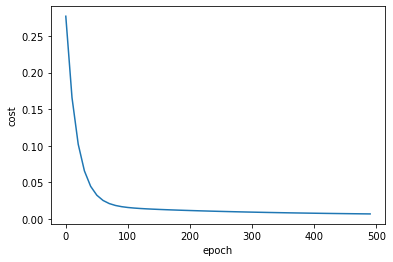

In [11]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)

In [14]:
def predict(area, bedrooms, weights, bias):
    X_scaled = sx.transform([[area, bedrooms]])[0]
    scaled_price = np.dot(weights, X_scaled) + bias
    
    return sy.inverse_transform([[scaled_price]])[0][0]

In [17]:
predict(2600, 4, weights, bias)

128.45484403267596

## stochastic gradient descent 

In [26]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    number_features = X.shape[1]
    weights = np.ones(shape=(number_features))
    bias = 0 
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        random_index = random.randint(0, total_samples - 1)
        X_sample = X[random_index]
        y_sample = y_true[random_index]
        
        y_predicted = np.dot(weights, X_sample.T) + bias #linear 
        
        weights_grad = -(2 / total_samples) * (X_sample.T.dot(y_sample-y_predicted))
        bias_grad = -(2 / total_samples) * np.sum(y_sample-y_predicted)
        
        weights = weights - learning_rate * weights_grad 
        bias = bias - learning_rate * bias_grad 
        
        cost = np.mean(np.square(y_sample-y_predicted)) #MSE 
        
        if i % 10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
    
    return weights, bias, cost, cost_list, epoch_list 

weights_sgd, bias_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(X_scaled,
                                                                                            y_scaled.reshape(y_scaled.shape[0],),
                                                                                            5000)
weights_sgd, bias_sgd, cost_sgd

(array([0.76546373, 0.73468317]), -0.28473691482568236, 0.007055153599616087)

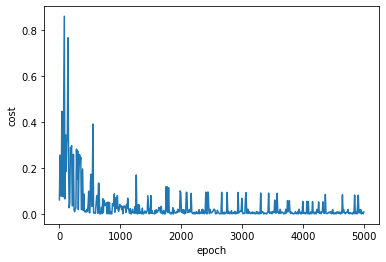

In [27]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd, cost_list_sgd)

In [28]:
predict(2600, 4, weights_sgd, bias_sgd)

132.08776847235004

## mini batch gradient descent 

In [37]:
def mini_batch_gradient_descent(X, y_true, epochs=100, batch_size=5, learning_rate=0.01):
    number_features = X.shape[1]
    weights = np.ones(shape=(number_features))
    bias = 0 
    total_samples = X.shape[0]
    
    if batch_size > total_samples:
        batch_size = total_samples
    
    cost_list = []
    epoch_list = []
    
    num_batches = int(total_samples / batch_size)
    
    for i in range(epochs):
        random_index = np.random.permutation(total_samples)
        X_tmp = X[random_index]
        y_tmp = y_true[random_index]
        
        for j in range(0, total_samples, batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            
            y_predicted = np.dot(weights, Xj.T) + bias 
            
            weights_grad = -(2 / len(Xj)) * (Xj.T.dot(yj - y_predicted))
            bias_grad = -(2 / len(Xj)) * np.sum(yj - y_predicted)
            
            weights = weights - learning_rate * weights_grad
            bias = bias - learning_rate * bias_grad 
            
            cost = np.mean(np.square(yj - y_predicted))
        
        if i % 10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return weights, bias, cost, cost_list, epoch_list 

w_mni, b_mni, c_mni, cl_mni, e_mni = mini_batch_gradient_descent(X_scaled,
                                                        y_scaled.reshape(y_scaled.shape[0],),
                                                        epochs=120, 
                                                        batch_size=5)
w_mni, b_mni, c_mni 

(array([0.71020403, 0.67826574]), -0.23311886249465866, 0.014798094947921826)

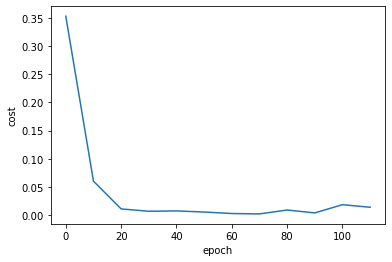

In [38]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(e_mni,cl_mni)

In [39]:
predict(2600, 4, w_mni, b_mni)

128.7135597427428